# Data Lesson Map

<font color=red>Red </font> highlighted is the topic covered for this lesson

1. <font color=red>Basics Data Science and Visualisation</font>
>* <font color=red>Obtaining Data</font>
>* Basic Data Processing
>* Basic statistics
>* <font color=red>Data visualization</font>
>* Handling erroneous and missing data
2. <font color=red>Data Machine Learning Techniques</font>
>* <font color=red>Supervised Learning Techniques</font>
>* Supervised Regression
>* Artificial Neural Networks
3. <font color=red>AI for Data Walkthrough</font>
>* Model Output
>* <font color=red>Outputs Visualisation and Validation</font>
4. <font color=red>AI Models </font>
>* Linear Regression
>* <font color=red>Underfitting vs Overfitting</font>
>* <font color=red>K-Nearest Neighbour (KNN)</font>
>* <font color=red>Decision Tree</font>
>* Convolutional Neural Networks (CNN)

# Outputs Visualisation and Validation

In previous workshops, you have learnt how to train different machine learning models and also use these trained models to make predictions. However, we have not focused on how to evaluate the performance of the model or visualise the outputs from the model. As such, we will now focus on how we can use different visualisation tools to help evaluate the performance of the model. In this notebook, you will learn how to utilise confusion matrix and heatmaps to evaluate your model. These tools will help to identify the accuracy of the model.

We first need to understand the concept of accuracy. How accurate does a model have to be before it is a good model? The answer depends on the use case of the model. For example, the model has to be very close to 100% accuracy if it involves huge financial amounts or illnesses identification. This is because these are important issues that may affect many people if the model were to be wrong by just fractions of a percent. On the other hand, if you were predicting movie recommendations or video recommendations it may be ok if it were less accurate as the implications of a wrong prediction are not as serious as the previously mentioned scenarios. Furthermore, it is also important to understand that it is almost impossible to obtain 100% accuracy as in order to do so, you will need to be able to collect every single data that is relevant to the problem. As such, you will need to balance the accuracy of the model with the amount of data that you have and also the use case. However, this does not mean that it is ok to stop after obtaining a low accuracy. You still need to try and see if you can make it better. Only when you have tried many ways and are unable to improve the accuracy then can you decide if the accuracy is good enough for the use case.

We will now see how we can use the visualisation tools for the machine learning techniques that you have tried in previous notebooks.

<font color=red>Your code:</font> 

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 1. K-Nearest Neighbours

We will again use the K-Nearest Neighbours algorithm on the Iris Flower dataset. Import the dataset as a dataframe df and label encode the dataset. Label encoding is the conversion of categories into numerical groups. Write the code to label encode the dataset as a function (label_encode) instead. This will allow the label encoding code to be re-used if necessary in the notebook. Read this [article](https://www.codementor.io/kaushikpal/user-defined-functions-in-python-8s7wyc8k2) to find out how to write a user defined function. When we code, it is always useful to write functions if we think that the functions would be used more than once in the script. Expand the code below to import and label encode the dataset.

<font color=red>Your code:</font> 

In [106]:
from google.colab import drive
drive.mount('/content/Intel_AI4Y')

Drive already mounted at /content/Intel_AI4Y; to attempt to forcibly remount, call drive.mount("/content/Intel_AI4Y", force_remount=True).


<font color=red>Your code:</font> 

In [107]:
df = pd.read_csv('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_18/data/iris.data')
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df.columns = names 
df.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [109]:
# Do the label encoding for df['class']
label_encode_setosa = {"class": {"Iris-setosa":1}}
label_encode_versicolor = {"class": {"Iris-versicolor":2}}
label_encode_virginica = {"class": {"Iris-virginica":3}}

df.replace(label_encode_setosa,inplace=True)
df.replace(label_encode_versicolor,inplace=True)
df.replace(label_encode_virginica,inplace=True)
print(df['class'].value_counts())


3    50
2    50
1    49
Name: class, dtype: int64


In [110]:
pd.get_dummies(df['class'])
# 0 = Iris-setosa 
# 1 = Iris-vesicolor
# 2 = Iris-virginica

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
144,0,0,1
145,0,0,1
146,0,0,1
147,0,0,1


Now, split the data into train and test sets and also standardise the data. Keep 30% of the data in the test set.

<font color=red>Your code:</font> 

In [111]:
# define the x_values and y_values 
x_values = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_values = df['class']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.30, random_state=10)

# x_train  x_test -> x_values  sepal length, sepal width, petal length, petal width
# y_train  y_test -> y_values Iris-setosa=0, Iris-versicolor=1, Iris-virginica=2


#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

In [112]:
# Proceed with standardisation
standardise = StandardScaler()

# fit_transform() -> learn and scale train data
x_train_scale = standardise.fit_transform(x_train)

# transform() ->  we use the scaling paramaters learned on the train data
# to scale the test data.
x_test_scale = standardise.transform(x_test)

print('Number of rows in x_train:', x_train.shape[0])
print('Number of rows in x_test:', x_test.shape[0])
print('Number of rows in y_train', y_train.shape[0])
print('Number of rows in y_test', y_test.shape[0])

Number of rows in x_train: 104
Number of rows in x_test: 45
Number of rows in y_train 104
Number of rows in y_test 45


Train a K-Nearest Neighbours algorithm with the dataset. Remember to use the optimal number of neighbours (6) found in the earlier notebook.

<font color=red>Your code:</font> 

In [113]:
acc = []
# Set number of neighbours to 6
knn = KNeighborsClassifier(n_neighbors=6)

# Training or fitting the model with the data
knn.fit(x_train_scale, y_train) # (sepal length, sepal width, petal length, petal width) -> class 0 1 2 

# .score provides the acc of the model based on the testing data. Store the acc into the list 
acc.append(knn.score(x_test_scale, y_test)) # 30% of test_size (sepal length, sepal width, petal length, petal width) -> class 0 1 2 

print(acc)




[0.9111111111111111]


In order to evaluate the performance of the model, we have to first predict the flower type or class based on the test set. Use the .predict on KNN to predict the flower classes based on the test set. Store the predictions as `y_predict`.

<font color=red>Your code:</font> 

In [114]:

predict_flower = knn.predict(x_test_scale)
print(predict_flower)


[2 2 1 2 2 2 2 2 1 3 3 3 2 1 1 3 3 1 1 1 2 2 2 1 2 1 2 3 2 2 3 3 2 3 2 1 2
 1 3 2 1 2 1 3 1]


We will use a tool known as a confusion matrix to help us to evaluate the model outputs. Read this [article](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) to find out more about the confusion matrix. What does a true positive refer to? What does a false negative refer to?

<font color=red>Your answer:</font> 

In [ ]:
# true positive -> you predicted positive and it's true
# true negative -> you predicted negative and it's true 

The confusion matrix discussed above is mainly for a 2 class classification problem. In the case of the Iris dataset, it is a multi-class problem as there are more than 2 different classes. In fact, there are 3 different classes or flower types. Thus, the confusion matrix for a multi-class scenario is an extension of the 2 class confusion matrix. As such, a multi-class confusion matrix may help identify which classes were wrongly classified by the model. Let us try to obtain the confusion matrix. Try the code below to import the confusion matrix function.

In [115]:
from sklearn.metrics import confusion_matrix  

Pass in the predicted values and the actual y values into the confusion matrix function. Try out the code below.

In [116]:
print(confusion_matrix(y_test, predict_flower))  

[[14  0  0]
 [ 0 17  1]
 [ 0  3 10]]


If the model is 100% accurate, there should only be non-zero numbers in the diagonal and zeroes everywhere else in the matrix. This is because the diagonals are where the predictions exactly match the actual data. From the above, we can see that the model is quite accurate and only 1 data point was wrongly classified by the model. Based on the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for the confusion_matrix function, are you able to find out which point was misclassified? What was the data point's original class and what was the data point's predicted class? 

<font color=red>Hint: The rows represent the actual classes whereas the columns represent the predicted classes. </font>


<font color=red>Your answer:</font> 

In [ ]:
# 1 of (class 3) was predicted as (class2)
# 3 of (class 2) was predicted as (class3)
# But the model is accurate enough :)

We can also present the confusion matrix in an easy to understand heatmap. We can use the library seaborn to help us. Make sure seaborn is installed in your virtual environment. After doing so, run the code below to import seaborn as sns.

In [117]:
import seaborn as sns

Try the code below to see the heatmap.

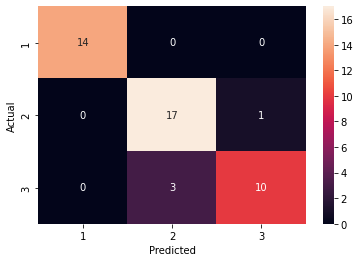

In [118]:
# Create new dataframe
df = pd.DataFrame()

# Create new columns within dataframe
df['Actual'] = y_test # actual class of flowers  
df['Predicted'] = predict_flower # predicted class of flowers 

# Use pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(df.Actual,df.Predicted)

# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")

## 2. Decision Tree

We can now apply the same methods to the decision tree. First, train a decision tree on the same dataset using max_depth of 2 and `min_samples_split` of `6`. Do you remember what `max_depth` and `min_samples_split` refer to? You can refer to the previous notebook (Model_Outputs) for more information on `max_depth` and `min_samples_split`.

<font color=red>Your code:</font> 

In [119]:
from sklearn import tree 


In [120]:
acc = []

dt = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=6)

dt.fit(x_train_scale, y_train)

acc.append(dt.score(x_test_scale, y_test))
print(acc)

[0.9333333333333333]


Predict the classes using the `x_test_scale` values.

<font color=red>Your code:</font>

In [121]:
predict_flower_dt = dt.predict(x_test_scale)
print(predict_flower_dt)

[2 2 1 2 2 2 2 2 1 3 3 3 2 1 1 3 2 1 1 1 2 2 2 1 2 1 2 3 2 2 3 3 2 3 2 1 2
 1 3 2 1 2 1 3 1]


Obtain and print the confusion matrix.

<font color=red>Your code:</font>

In [122]:
print(confusion_matrix(y_test, predict_flower_dt)) 

[[14  0  0]
 [ 0 18  0]
 [ 0  3 10]]


Are there any wrong classification of data? If so, how many points were wrongly classified? What were the actual and predicted classses of the wrongly classified points?


<font color=red>Your answer:</font> 

In [ ]:
# 3 of (class2) was predicted as (class3)

Plot the heatmap for this confusion matrix.

<font color=red>Your code:</font> 

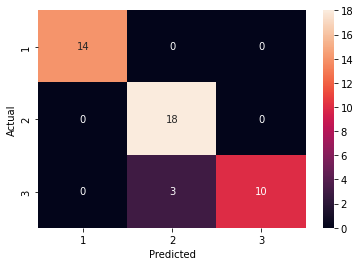

In [123]:
# Create new dataframe
df_dt = pd.DataFrame()

# Create new columns within dataframe
df_dt['Actual'] = y_test # actual class of flowers  
df_dt['Predicted'] = predict_flower_dt # predicted class of flowers 

# Use pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(df_dt.Actual,df_dt.Predicted)

# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")

By comparing the confusion matrices, which do you think is a better model for the problem? Why is it a better model? Discuss with your friends and list your answer below.

<font color=red>Your answer:</font> 

In [ ]:
# The decision tree model is a better choice, Why???

# For KNN model:
# 1 of (class 3) was predicted as (class2)
# 3 of (class 2) was predicted as (class3)


# For dt model:
# 3 of (class2) was predicted as (class3)

# KNN heatmap

Additionally, when accuracy is similar, there are also other metrics to also consider. These include precision, recall and F1 score. Please read this [link](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) and this [link](https://medium.com/@raghaviadoni/evaluation-metrics-i-precision-recall-and-f1-score-3ec25e9fb5d3) for more information on these metrics. How would you use these metrics to help decide on your model choice?

<font color=red>Your answer:</font> 

In [ ]:
# Precision is a good measure to determine, when the costs of False Positive is high. 
# For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) 
# has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

# Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

# F1 Score is needed when you want to seek a balance between Precision and Recall. 

After deciding on a model, we can also use the model to identify flower types for newly gathered data. For example, imagine that your friend has measured the `sepal_length`, `sepal_width`, `petal_length` and `petal_width` of some flowers and saved the data in a file called "`iris_predict.data`". Your friend wants to find the flower types for these flowers based on the values measured. Would you be able to use your model to help your friend? What are the flower types that your friend measured?
<font color=green>Hint: Do you remember using the .predict method earlier to obtain the flower types for the test cases? You can also do the same to obtain the flower types for your friend. You will also need to scale your data before obtaining the flower types. </font>

<font color=red>Your code:</font> 

In [127]:
# Reading in my friend's data
df_friend = pd.read_csv('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_18/data/iris_predict.data')
names_friend = ['sepal length', 'sepal width', 'petal length', 'petal width']
df_friend.columns = names_friend
print(df_friend)







   sepal length  sepal width  petal length  petal width
0           5.0          3.1           1.5          0.3
1           4.8          3.3           1.4          0.3
2           6.4          3.4           4.8          1.7
3           5.0          2.5           3.4          1.1
4           6.4          2.8           5.0          1.9
5           6.8          3.4           5.8          2.2
6           7.3          3.3           6.1          1.9
7           6.3          2.9           4.9          1.9
8           5.9          2.8           4.2          1.1


In [131]:
# scale the data first
# Proceed with standardisation
standardise = StandardScaler()

# fit_transform() -> learn and scale train data
x_train_scale_friend = standardise.fit_transform(df_friend)

# transform() ->  we use the scaling paramaters learned on the train data
# to scale the test data.
x_test_scale_friend = standardise.transform(df_friend)
print(x_train_scale_friend)




[[-1.19251104  0.14704292 -1.62708326 -1.6016111 ]
 [-1.43369305  0.80873608 -1.68913305 -1.6016111 ]
 [ 0.49576302  1.13958266  0.42055966  0.47883219]
 [-1.19251104 -1.83803656 -0.44813734 -0.41278637]
 [ 0.49576302 -0.84549682  0.54465923  0.77603837]
 [ 0.97812703  1.13958266  1.04105751  1.22184765]
 [ 1.58108206  0.80873608  1.22720687  0.77603837]
 [ 0.37517201 -0.51465024  0.48260944  0.77603837]
 [-0.107192   -0.84549682  0.04826094 -0.41278637]]


In [132]:
acc_friend = []

dt_friend = tree.DecisionTreeClassifier()

dt_friend.fit(x_train_scale, y_train)

acc_friend.append(dt_friend.score(x_test_scale, y_test))
print(acc_friend)

[0.9333333333333333]


In [138]:
predict_flower_dt_friend = dt.predict(x_test_scale_friend)
print(predict_flower_dt_friend)
# I cannot do a confusion matrix for my friend because his dataset does not have a actual value for class-> Iris-setosa, Iris-versicolor, Iris-virginica
# There is no way the confusion matrix will match the dataframe values 
# I can only predict his flower type


[1 1 2 2 3 3 3 3 2]


In [143]:
flower_types_df = pd.DataFrame({"class": [1, 1, 2, 2, 3, 3, 3, 3, 2]})

new_friend_df = df_friend.join(flower_types_df)
print(new_friend_df)

   sepal length  sepal width  petal length  petal width  class
0           5.0          3.1           1.5          0.3      1
1           4.8          3.3           1.4          0.3      1
2           6.4          3.4           4.8          1.7      2
3           5.0          2.5           3.4          1.1      2
4           6.4          2.8           5.0          1.9      3
5           6.8          3.4           5.8          2.2      3
6           7.3          3.3           6.1          1.9      3
7           6.3          2.9           4.9          1.9      3
8           5.9          2.8           4.2          1.1      2
